## Task 4:

   Age  Gender  Daily Study Hours Preferred Study Time Enjoys Online Learning  \
0   23  Female                  7              Evening                    Yes   
1   23    Male                  8            Afternoon                     No   
2   25  Female                  3              Morning                     No   
3   19  Female                  4              Morning                    Yes   
4   25  Female                  8              Morning                     No   

  Device Used  GPA Internet Speed Attends Group Study Preferred Learning Mode  
0      Mobile  2.5        Average                 Yes       Recorded Lectures  
1      Tablet  3.5           Fast                  No          Online Quizzes  
2      Tablet  2.8        Average                  No       Recorded Lectures  
3     Desktop  4.0           Fast                  No       Recorded Lectures  
4      Mobile  2.8           Fast                  No          Online Quizzes  


Basic dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      105 non-null    int64  
 1   Gender                   105 non-null    object 
 2   Daily Study Hours        105 non-null    int64  
 3   Preferred Study Time     105 non-null    object 
 4   Enjoys Online Learning   105 non-null    object 
 5   Device Used              105 non-null    object 
 6   GPA                      105 non-null    float64
 7   Internet Speed           105 non-null    object 
 8   Attends Group Study      105 non-null    object 
 9   Preferred Learning Mode  105 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.3+ KB
None 

Summary statistics:
               Age  Gender  Daily Study Hours Preferred Study Time  \
count   105.000000     105         105.000000                  105  

In [16]:
df['Enjoys Online Learning'] = df['Enjoys Online Learning'].map({'Yes': 1, 'No': 0})

X = pd.get_dummies(df.drop("Enjoys Online Learning", axis=1), drop_first=True)
y = df["Enjoys Online Learning"]

chi2_selector = SelectKBest(score_func=chi2, k=5)
X_new = chi2_selector.fit_transform(X, y)

selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Score': chi2_selector.scores_
}).sort_values(by="Score", ascending=False)

print("Top Selected Features based on Chi-Square:\n", selected_features.head(), "\n")

Top Selected Features based on Chi-Square:
                                       Feature     Score
4                                Gender_Other  1.676033
5                Preferred Study Time_Evening  1.276818
11                        Internet Speed_Fast  1.018182
16         Preferred Learning Mode_Self-Study  0.804306
15  Preferred Learning Mode_Recorded Lectures  0.743243 



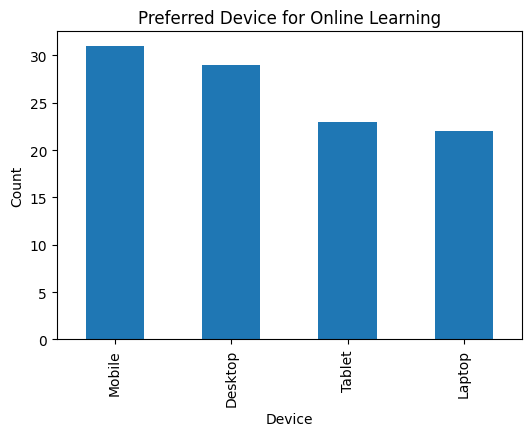

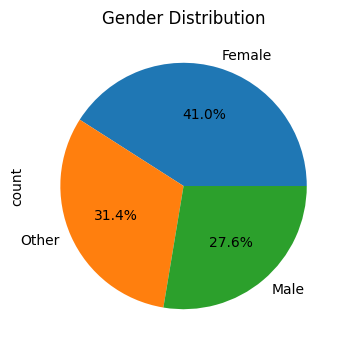

In [17]:
plt.figure(figsize=(6,4))
df['Device Used'].value_counts().plot(kind='bar')
plt.title("Preferred Device for Online Learning")
plt.xlabel("Device")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,4))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


In [18]:
print("Duplicate Records Before Handling:", df.duplicated().sum(), "\n")
df = df.drop_duplicates()
print("Duplicate Records After Handling:", df.duplicated().sum())

Duplicate Records Before Handling: 0 

Duplicate Records After Handling: 0
